In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#comment below if not using ipython notebook
%matplotlib inline

### load the CSV file into a dataframe

In [2]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
    
df.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


There are 5 predictor variables and one output variable. Let's blinded fit an OLS model to find if we can get a solution!

### prepare the dataset for regression

In [3]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

### helper methods

In [4]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)


### fit the OLS model and check the loss.

In [5]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(xx, yy)
yhat = model1.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss)

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
Loss : 71877.84134016866


The loss is observed to very high!  Something's fishy.  Ain't it!?

### let's check the statistics of the features and outputs.

In [6]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.548713,23.755050,111.371386,98.133762,34.000000,10244.460297
std,0.380115,292.850177,55.812213,4.942089,30.557704,1022.766123
min,6.680000,-466.860000,9.800000,86.830000,0.000000,8062.540000
25%,7.250000,-208.890000,66.380000,94.240000,6.760000,9469.940000
50%,7.530000,38.950000,104.180000,97.900000,25.000000,10187.660000
75%,7.800000,262.920000,168.160000,101.420000,57.760000,10866.630000
max,8.370000,546.880000,195.810000,108.850000,100.000000,12631.050000


### let's check the correlation amongst the predictor variables.

In [7]:
corr = np.corrcoef(xx.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


### let's check the features are correlating heavily.

In [8]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


Looks like feature 1 and feature 4 are heavily correlating.  It may be worth removing one of those features from our system.

### let's add the output column to the mix and re-evaluate the correlation coefficient.

In [9]:
all_data = np.concatenate((xx, yy), axis=1)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [10]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


Looks like features 1, 2 and 4 are strongly correlating with the output individually.  We see that the features 3 and 5 are not correlating well.  But, that doesn't mean that they are useless.  Remember, correlation is a linear relationship estimation method.  When the relationship is not-linear, correlation coefficient will not be conclusive.  So, our resolve here is; either the features are not relevant or there is a non-linear relationship amongst the features and the output.

### let's try to visualize the relationships through a pair-plot.

In [57]:
#import seaborn as sb
#sb.pairplot(df)

### Brilliant, more patterns have evolved.  And in fact, the mathematical model is almost visible from the plot!

__let's try using principal component analysis to extract useful features__

In [12]:
from sklearn.decomposition import PCA

__let's extract the principal components.  also review the amount of variance those two components capture in total.  more the components, more the information from the data is captured.__

In [239]:
pca = PCA(n_components=1)
pca.fit(X=xx)
print("Vaiances captured by the components :", pca.explained_variance_ratio_)
print("Total variance information captured :", 100*round(np.sum(pca.explained_variance_ratio_),2), "%")

Vaiances captured by the components : [0.95483093]
Total variance information captured : 95.0 %


__let's review the weights of the linear combination of the input features that construct the principal components__

In [240]:
print("Shape of the transformation matrix :", pca.components_.shape)
print("Transformation matrix : ", pca.components_)
print("Variances :", pca.explained_variance_)

Shape of the transformation matrix : (1, 5)
Transformation matrix :  [[ 9.11911751e-04  9.99908245e-01 -6.45445502e-03  1.18718391e-02
   2.64998841e-04]]
Variances : [85776.82710988]


__let's project the 5-d data into the PC space to visualize any obvious patterns__

Shape of the transformed input space : (101, 1)


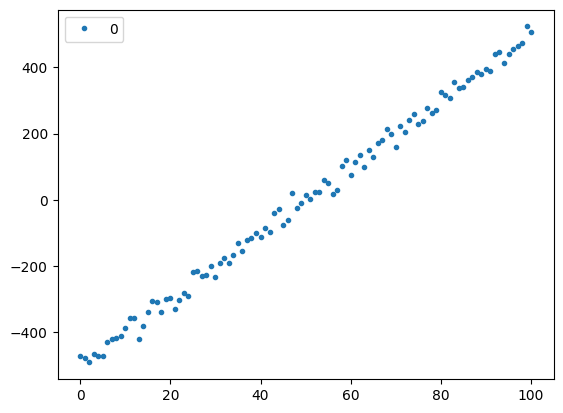

In [241]:
xx_transformed = pca.transform(xx)
print("Shape of the transformed input space :", xx_transformed.shape)
plt.plot(xx_transformed, '.')
plt.legend([str(_) for _ in range(xx_transformed.shape[1])])

__fit a linear regression on the pricipal component transformed space to check if it helps reducing the loss further__

In [242]:
model2 = linear_model.LinearRegression()
model2.fit(xx_transformed, yy)
yhat2 = model2.predict(xx_transformed)
loss2 = SSE(yy, yhat2)
print("Beta :", model2.coef_, " Bias :", model2.intercept_)
print("Loss :",loss2)

Beta : [[2.50402032]]  Bias : [10244.46029703]
Loss : 50821973.542042345


__the loss stands higher than the vanilla model with lesser number of components, unfortunately!!  Nonetheless, PCA gives us reduction by 1 feature count without much of a loss in performance__

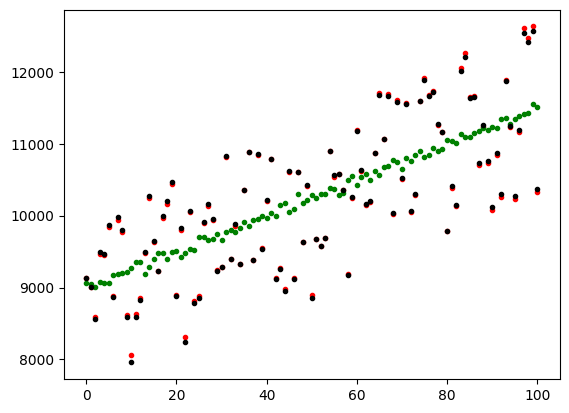

Gap : 50750095.70070227


In [243]:
plt.plot(yy, 'r.')
plt.plot(yhat2, 'g.')
plt.plot(yhat, 'k.')
plt.show()
print("Gap :", SSE(yhat, yhat2))

__Now, we are motivated to check out the non-linear PCA, called Kernel PCA__

In [275]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=1, kernel='linear', degree=2, gamma=0.000001)
kpca.fit(X=xx)
#print("Vaiances captured by the components :", pca.explained_variance_ratio_)
#print("Total variance information captured :", 100*round(np.sum(pca.explained_variance_ratio_),2), "%")

KernelPCA(degree=2, gamma=1e-06, n_components=1)

__let's project the 5-d data into the PC space to visualize any obvious patterns__

Shape of the transformed input space : (101, 1)


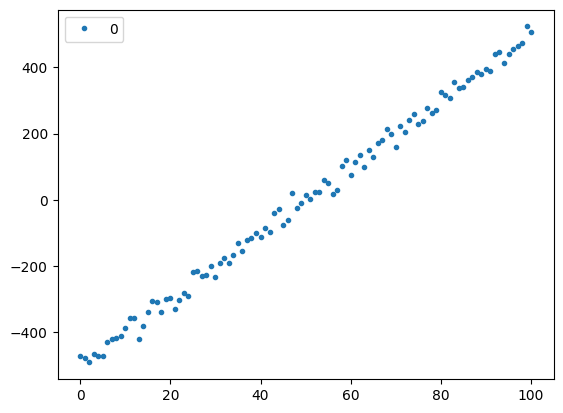

In [276]:
xx_transformed_k = kpca.transform(xx)
print("Shape of the transformed input space :", xx_transformed_k.shape)
plt.plot(xx_transformed_k, '.')
plt.legend([str(_) for _ in range(xx_transformed_k.shape[1])])

__fit a linear regression on the pricipal component transformed space to check if it helps reducing the loss further__

In [277]:
model3 = linear_model.LinearRegression()
model3.fit(xx_transformed_k, yy)
yhat3 = model3.predict(xx_transformed_k)
loss3 = SSE(yy, yhat3)
print("Beta :", model3.coef_, " Bias :", model3.intercept_)
print("Loss :",loss2)

Beta : [[2.50402032]]  Bias : [10244.46029703]
Loss : 50821973.542042345


__the loss stands higher than the vanilla model, unfortunately!!__

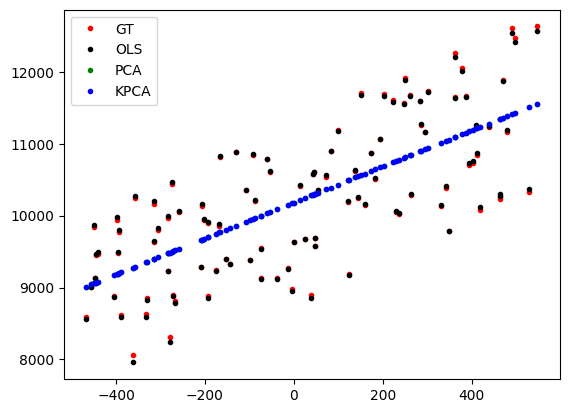

In [278]:
plt.plot(xx[:,1], yy, 'r.')
plt.plot(xx[:,1],yhat, 'k.')
plt.plot(xx[:,1],yhat2, 'g.')
plt.plot(xx[:,1],yhat3, 'b.')

plt.legend(['GT', 'OLS', 'PCA', 'KPCA'], loc='upper left')